# Iris Flower Species Prediction

This notebook is a multi-class classification project where we are going to classify species of the iris flower using given sepal and petal dimensions of some flower samples.

Below is the approach we are going to follow:
1. Problem definition
2. Data Overview 
3. Features
4. Exploratory Data Analysis
5. Data Visualization
6. Modelling
7. Evaluation

### 1. Problem Definition

In a statement,
> Given dimensions of the sepals and petals of some iris flower samples, can we predict which species they are?

##### Importing all required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle

# Exploratory Data Analysis and Statistics
from sklearn import datasets
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
# We want our plots to appear inside the notebook
%matplotlib inline
import seaborn as sns

# Modelling and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### 2. Data Overview

The dataset used is an in-built scikit-learn standard dataset. It can be accessed here: https://scikit-learn.org/stable/datasets/toy_dataset.html

### 3. Features

This is where information about each of the features in our dataset is provided

**Let us create a data dictionary**

1. sepal length in centimetres
2. sepal width in centimetres
3. petal length in centimetres
4. petal length in centimetres

### 4. Exploratory Data Analysis

Time for some quick EDA...but before we begin, let's load the dataset

#### Loading the datasets

In [2]:
# Loading the iris dataset from sklearn
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, 
                      columns = iris.feature_names)

In [3]:
# Viewing our dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Viewing the dataset's columns
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
# Checking statistics of the columns of our data
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Checking for missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There are no missing values in the dataset.

In [7]:
# Checking the information of our data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Our dataset has 4 columns and 150 rows

In [8]:
# Checking the shape of our data
iris_df.shape

(150, 4)

Great! Enough EDA for now.

**Next, let us add some new columns to our data**

In [9]:
# Creating a target column for the dataframe
iris_df['target'] = iris.target

species = {
    0:'iris-setosa',
    1:'iris-versicolor',
    2:'iris-virginica'
}

# Creating a new column called 'species' and mapping targets to this column
iris_df['species'] = iris_df['target'].map(species)

**Now, we are going to remove the spaces and parenthesis in our column names**

In [10]:
iris_df.rename(columns = {'sepal length (cm)':'sepal_length', 'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length', 'petal width (cm)':'petal_width'},
                          inplace=True)
                    
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


Awesome! Everything worked perfectly

In [11]:
iris_df["species"].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: species, dtype: int64

It looks like each species has a total of 50 instances

### 5. Data Visualization

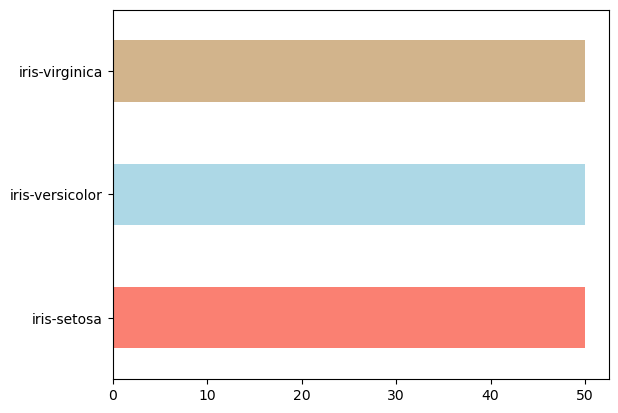

In [12]:
# Bar chart of various species
iris_df["species"].value_counts().plot(kind="barh", color=["salmon", "lightblue", "tan"]);

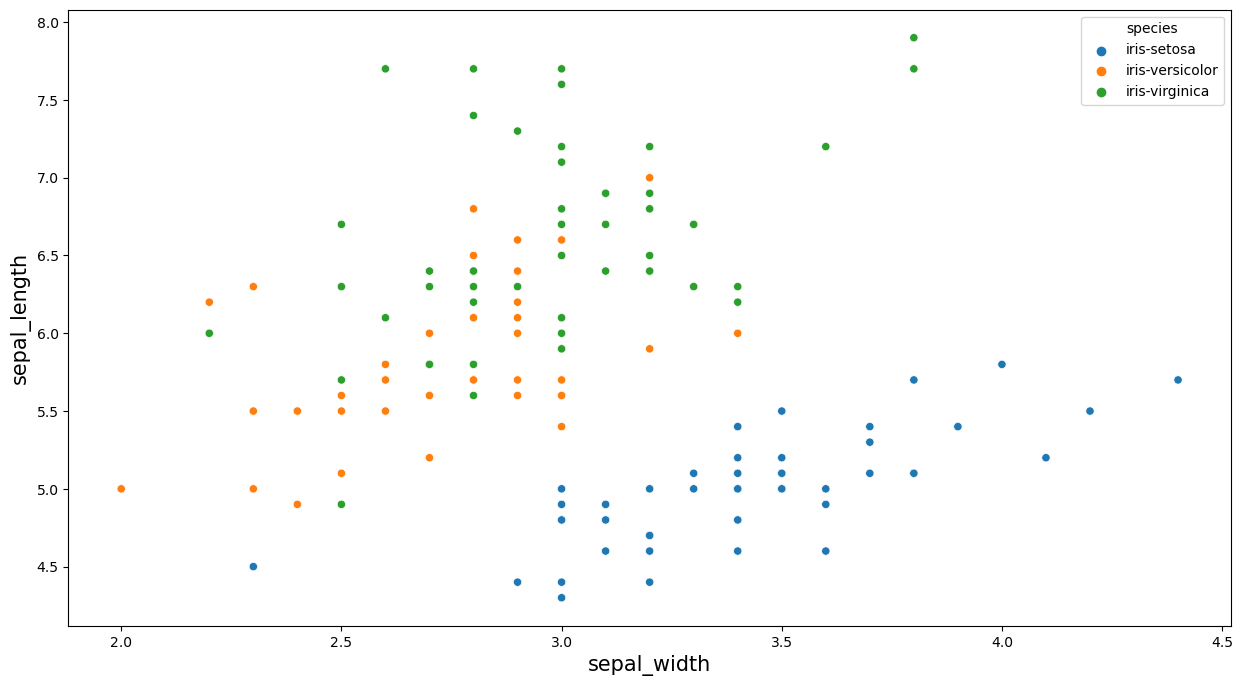

In [13]:
# Scatterplot of sepal dimensions
plt.figure(figsize=(15,8))
sns.scatterplot(data=iris_df, x=iris_df["sepal_width"], y=iris_df["sepal_length"], 
                hue="species")
plt.xlabel('sepal_width', fontsize=15)
plt.ylabel('sepal_length', fontsize=15);

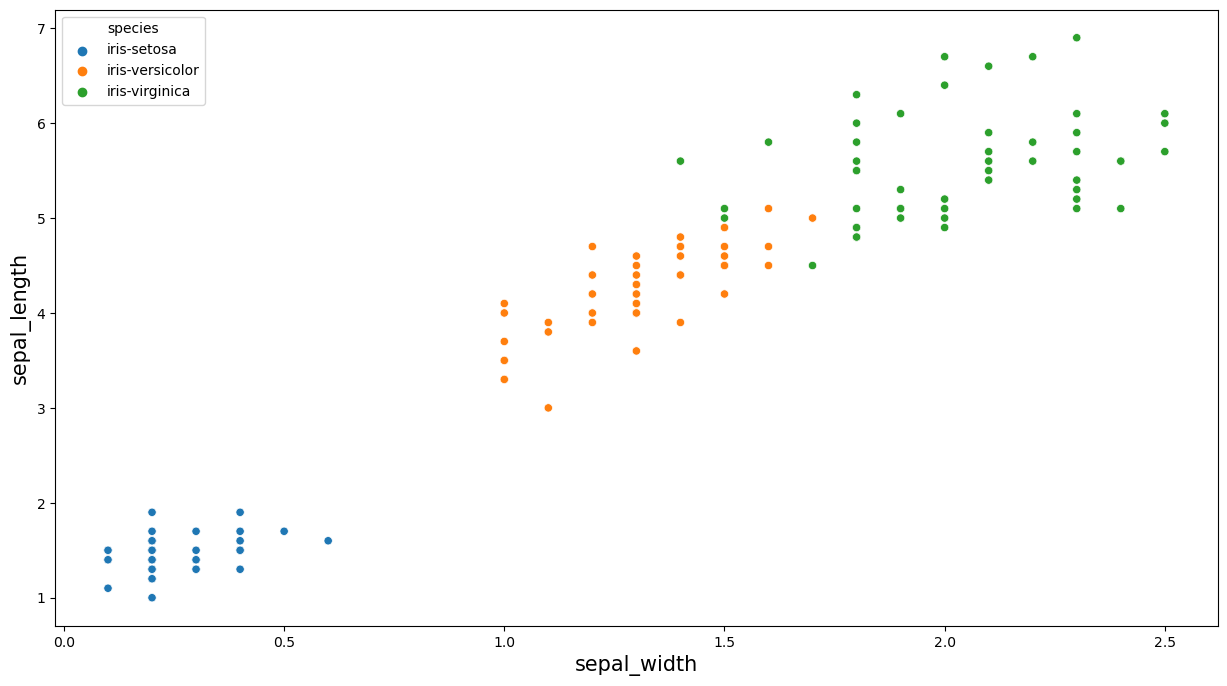

In [14]:
# Scatterplot of petal dimensions
plt.figure(figsize=(15,8))
sns.scatterplot(data=iris_df, x=iris_df["petal_width"], y=iris_df["petal_length"], 
                hue="species")
plt.xlabel('sepal_width', fontsize=15)
plt.ylabel('sepal_length', fontsize=15);

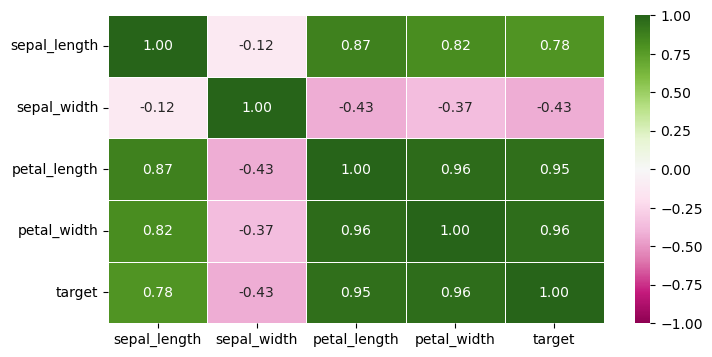

In [15]:
# Visualizing the correlation matrix of our data
corr_matrix = iris_df.corr()
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PiYG",
                vmin=-1, vmax=1);

### 6. Modelling

**Time to build our classification model**

**First of all, we are going to drop any unwanted columns**

In [16]:
iris_df = iris_df.drop(columns="target")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica


**Next, we are going to define our X and y**

In [17]:
X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,4]

In [18]:
# Viewing X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# Viewing y
y

0         iris-setosa
1         iris-setosa
2         iris-setosa
3         iris-setosa
4         iris-setosa
            ...      
145    iris-virginica
146    iris-virginica
147    iris-virginica
148    iris-virginica
149    iris-virginica
Name: species, Length: 150, dtype: object

In [20]:
# Viewing the shape of X
X.shape

(150, 4)

In [21]:
# Viewing the shape of X
y.shape

(150,)

**Now we are going to split our X and y to train and test splits**

In [22]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
# Viewing the shape of X_train
X_train.shape

(112, 4)

In [24]:
# Viewing the shape of X_test
X_test.shape

(38, 4)

In [25]:
# Viewing the shape of y_train
y_train.shape

(112,)

In [26]:
# Viewing the shape of y_test
y_test.shape

(38,)

**Next, we are going to build some machine learning models**

In [27]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Setting random seed
    np.random.seed(42)
    # Making a dictionary to keep model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        # Fitting the model to the data
        model.fit(X_train, y_train)
        # Evaluating the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9736842105263158,
 'KNN': 0.9736842105263158,
 'Random Forest': 0.9736842105263158}

Looks like all our models have the same accuracy, so we will just select any of the models. Let's
use the Logistic Regression for this project.

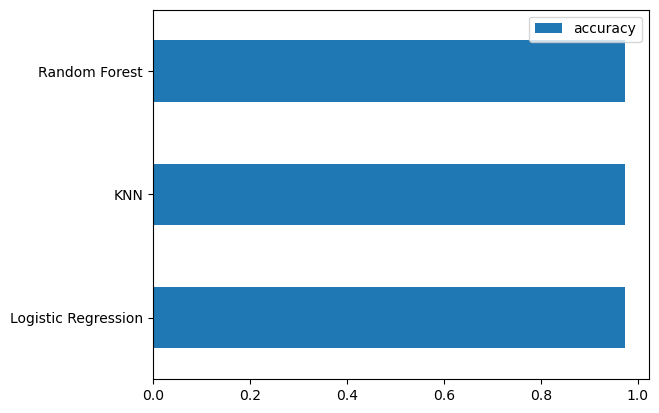

In [29]:
# Visually comparing our models 
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.barh();

In [30]:
# Training our preffered model
model = LogisticRegression()
model = model.fit(X_train, y_train)
model

LogisticRegression()

In [31]:
# Saving our preferred model as a pickle file
pickle.dump(model,open('iris.pkl','wb'))

# Loading our model
ideal_model = pickle.load(open('iris.pkl','rb'))

### 7. Evaluation

In [32]:
# Making predictions 
y_preds = ideal_model.predict(X_test)
y_preds

array(['iris-virginica', 'iris-versicolor', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-virginica', 'iris-setosa',
       'iris-versicolor', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-versicolor', 'iris-versicolor',
       'iris-versicolor', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-versicolor', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-versicolor', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor', 'iris-setosa', 'iris-virginica',
       'iris-versicolor', 'iris-setosa', 'iris-virginica',
       'iris-virginica', 'iris-versicolor', 'iris-setosa',
       'iris-virginica'], dtype=object)

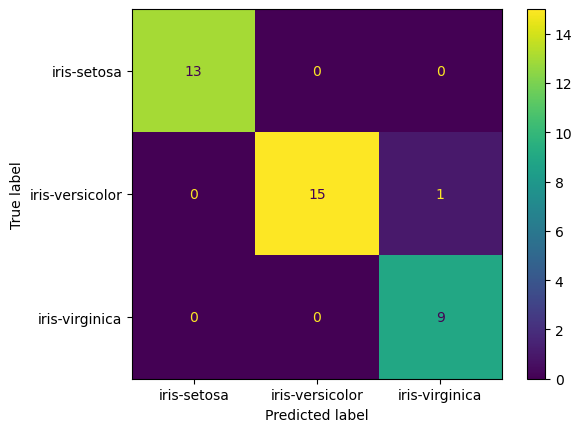

In [33]:
# ConfusionMatrixDisplay(from_prediction)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds, cmap='viridis');

In [34]:
# Checking the ideal model's accuracy 
accuracy = accuracy_score(y_test, y_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 97.37%


In [35]:
# Classification report
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        13
iris-versicolor       1.00      0.94      0.97        16
 iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

